Exercício 1. Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("Covid_19_Countrywise_timeseries.csv")

<AxesSubplot:ylabel='country'>

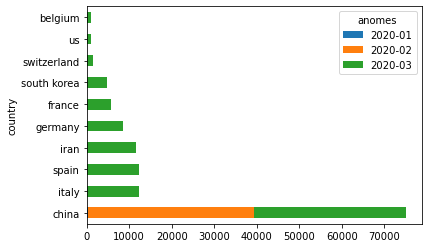

In [7]:
df['anomes'] = pd.to_datetime(df['ObservationDate']).astype('string').str.slice(0, 7, 1)
df

matriz_agregacao = pd.pivot_table(df, values='New Recovered', index='country', columns='anomes', aggfunc='sum').fillna(0)
matriz_agregacao = matriz_agregacao.sort_values('2020-03', ascending=False)[:10]
matriz_agregacao.plot(kind = 'barh', stacked=True)

Exercício 2. Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

In [8]:
df = pd.read_csv("co2_emissions_kt_by_country.csv")

In [9]:
df_brazil = df[df['country_name'] == 'Brazil']

<AxesSubplot:title={'center':'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

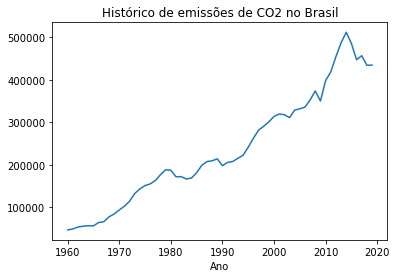

In [10]:
df_brazil.plot(kind = 'line', x = 'year', y = 'value', legend = False,
              title = 'Histórico de emissões de CO2 no Brasil',
              xlabel = 'Ano')

Exercício 3. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

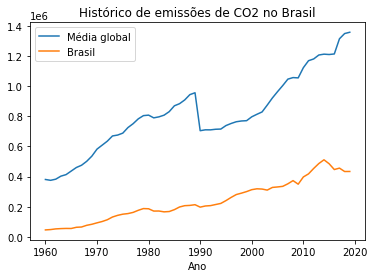

In [11]:
df_average = df[df['country_name'] != 'Brazil'].groupby("year")['value'].mean()
ax = df_average.plot()

df[df['country_name'] == 'Brazil'].plot(kind = 'line', x = 'year', y = 'value', title = 'Histórico de emissões de CO2 no Brasil',
                                       xlabel = 'Ano', ax = ax)
ax.legend(['Média global', 'Brasil'])

Exercício 4. Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

In [12]:
df['last_year_emission'] = df.sort_values(by = 'year', ascending = True).groupby("country_name")['value'].shift(1)
df['delta_emission'] = (df['value'] - df['last_year_emission'])/df['last_year_emission']

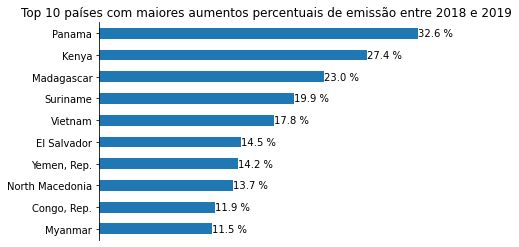

In [13]:
ax = df[df['year'] == 2019].sort_values(by = 'delta_emission', ascending = False)\
[['country_name','delta_emission']][0:10].sort_values(by = 'delta_emission', ascending = True)\
.plot(kind = 'barh', y = 'delta_emission', x = 'country_name',
     legend = False, title = 'Top 10 países com maiores aumentos percentuais de emissão entre 2018 e 2019',
     xlabel = '')

ax.bar_label(ax.containers[0], labels = [f"{round(100*x,1)} %" for x in ax.containers[0].datavalues])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)